In [1082]:
# install dependencies for prophet
!pip install prophet


In [1083]:
#import dependencies
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from prophet import Prophet

%matplotlib inline

In [1084]:
# import the 911 event data
tri_state_911_df = pd.read_csv('resources/birthdata/ny_nj_ct_911_birth_data.csv', index_col='Date', parse_dates=True)
other_states_911_df = pd.read_csv('resources/birthdata/other_states_911_birth_data.csv', index_col='Date', parse_dates=True)
# import the katrina data
la_katrina_df = pd.read_csv('resources/birthdata/la_katrina_birth_data.csv', index_col='Date', parse_dates=True)
other_states_katrina_df = pd.read_csv('resources/birthdata/other_states_katrina_birth_data.csv', index_col='Date', parse_dates=True)

# display the data
display(tri_state_911_df.info())
display(other_states_911_df.info())
display(la_katrina_df.info())
display(other_states_katrina_df.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1116 entries, 1985-01-01 to 2015-12-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    1116 non-null   int64 
 1   Births  1116 non-null   int64 
 2   State   1116 non-null   object
dtypes: int64(2), object(1)
memory usage: 34.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16992 entries, 1985-01-01 to 2015-12-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    16992 non-null  int64 
 1   Births  16992 non-null  int64 
 2   State   16992 non-null  object
dtypes: int64(2), object(1)
memory usage: 531.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 372 entries, 1985-01-01 to 2015-12-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    372 non-null    int64 
 1   Births  372 non-null    int64 
 2   State   372 non-null    object
dtypes: int64(2), object(1)
memory usage: 11.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17736 entries, 1985-01-01 to 2015-12-01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    17736 non-null  int64 
 1   Births  17736 non-null  int64 
 2   State   17736 non-null  object
dtypes: int64(2), object(1)
memory usage: 554.2+ KB


None

In [1085]:
# drop Year  and State column
tri_state_911_df.drop(columns=['Year','State'], inplace=True)
other_states_911_df.drop(columns=['Year','State'], inplace=True)
la_katrina_df.drop(columns=['Year','State'], inplace=True)
other_states_katrina_df.drop(columns=['Year','State'], inplace=True)

# rename the columns
tri_state_911_df.columns = ['NY_NJ_CT_911_Births']
other_states_911_df.columns = ['Other_States_911_Births']   
la_katrina_df.columns = ['LA_Katrina_Births']
other_states_katrina_df.columns = ['Other_States_Katrina_Births']


# display the data
display(tri_state_911_df.info())
display(other_states_911_df.info())
display(la_katrina_df.info())
display(other_states_katrina_df.info())




<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1116 entries, 1985-01-01 to 2015-12-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   NY_NJ_CT_911_Births  1116 non-null   int64
dtypes: int64(1)
memory usage: 17.4 KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16992 entries, 1985-01-01 to 2015-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Other_States_911_Births  16992 non-null  int64
dtypes: int64(1)
memory usage: 265.5 KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 372 entries, 1985-01-01 to 2015-12-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   LA_Katrina_Births  372 non-null    int64
dtypes: int64(1)
memory usage: 5.8 KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17736 entries, 1985-01-01 to 2015-12-01
Data columns (total 1 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Other_States_Katrina_Births  17736 non-null  int64
dtypes: int64(1)
memory usage: 277.1 KB


None

In [1086]:
# sum of births for every day
tri_state_911_df = tri_state_911_df.groupby('Date').sum()
other_states_911_df = other_states_911_df.groupby('Date').sum()
la_katrina_df = la_katrina_df.groupby('Date').sum()
other_states_katrina_df = other_states_katrina_df.groupby('Date').sum()

# display the data
display(tri_state_911_df.head())
display(other_states_911_df.head())
display(la_katrina_df.head())
display(la_katrina_df.tail(20))
display(other_states_katrina_df.head())


,NY_NJ_CT_911_Births
Date,
1985-01-01,20990
1985-02-01,19500
1985-03-01,21541
1985-04-01,21149
1985-05-01,22006


,Other_States_911_Births
Date,
1985-01-01,254893
1985-02-01,235307
1985-03-01,260061
1985-04-01,252359
1985-05-01,265930


,LA_Katrina_Births
Date,
1985-01-01,6234
1985-02-01,6071
1985-03-01,6797
1985-04-01,6753
1985-05-01,7254


,LA_Katrina_Births
Date,
2014-05-01,5086
2014-06-01,5022
2014-07-01,5609
2014-08-01,5548
2014-09-01,5743
2014-10-01,5722
2014-11-01,5277
2014-12-01,5964
2015-01-01,5389


,Other_States_Katrina_Births
Date,
1985-01-01,269649
1985-02-01,248736
1985-03-01,274805
1985-04-01,266755
1985-05-01,280682


In [1087]:
# create a new dataframe with data from 1998 to 2000 for 911 data

tri_state_911_98_00_df = tri_state_911_df.loc['1998-01-01':'2000-12-31']
other_states_911_98_00_df = other_states_911_df.loc['1998-01-01':'2000-12-31']
# create a new dataframe with data from 2002 to 2004 for 911 data
tri_state_911_02_04_df = tri_state_911_df.loc['2002-01-01':'2004-12-31']
other_states_911_02_04_df = other_states_911_df.loc['2002-01-01':'2004-12-31']
# display the data
# display(tri_state_911_02_04_df.head())
# display(other_states_911_02_04_df.head())
display(tri_state_911_02_04_df.info())
display(other_states_911_02_04_df.info())
display(tri_state_911_02_04_df.dtypes)




<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2002-01-01 to 2004-12-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   NY_NJ_CT_911_Births  36 non-null     int64
dtypes: int64(1)
memory usage: 576.0 bytes


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2002-01-01 to 2004-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Other_States_911_Births  36 non-null     int64
dtypes: int64(1)
memory usage: 576.0 bytes


None

NY_NJ_CT_911_Births    int64
dtype: object

In [1088]:
# create a new dataframe with data from 2002 to 2004 for katrina data
la_katrina_02_04_df = la_katrina_df.loc['2002-01-01':'2004-12-31']
other_states_katrina_02_04_df = other_states_katrina_df.loc['2002-01-01':'2004-12-31']
# display the data
display(la_katrina_02_04_df.info())
display(other_states_katrina_02_04_df.info())
# create a new dataframe with data from 2006 to 2008 for katrina data
la_katrina_06_08_df = la_katrina_df.loc['2006-01-01':'2008-12-31']
other_states_katrina_06_08_df = other_states_katrina_df.loc['2006-01-01':'2008-12-31']
# display the data
display(la_katrina_06_08_df.info())
display(other_states_katrina_06_08_df.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2002-01-01 to 2004-12-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   LA_Katrina_Births  36 non-null     int64
dtypes: int64(1)
memory usage: 576.0 bytes


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2002-01-01 to 2004-12-01
Data columns (total 1 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Other_States_Katrina_Births  36 non-null     int64
dtypes: int64(1)
memory usage: 576.0 bytes


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2006-01-01 to 2008-12-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   LA_Katrina_Births  36 non-null     int64
dtypes: int64(1)
memory usage: 576.0 bytes


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2006-01-01 to 2008-12-01
Data columns (total 1 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Other_States_Katrina_Births  36 non-null     int64
dtypes: int64(1)
memory usage: 576.0 bytes


None

In [1089]:
# create a dataframe that shows the average number of births for every month from 1998 to 2000 for 911 data
tri_state_911_98_00_avg_df = tri_state_911_98_00_df.groupby(tri_state_911_98_00_df.index.month).mean()
other_states_911_98_00_avg_df = other_states_911_98_00_df.groupby(other_states_911_98_00_df.index.month).mean()

# create a dataframe that shows the average number of births for every month from 2002 to 2004 for 911 data
tri_state_911_02_04_avg_df = tri_state_911_02_04_df.groupby(tri_state_911_02_04_df.index.month).mean()
other_states_911_02_04_avg_df = other_states_911_02_04_df.groupby(other_states_911_02_04_df.index.month).mean()

# display the data
display(tri_state_911_98_00_avg_df.head())
display(other_states_911_98_00_avg_df.head())
display(tri_state_911_98_00_avg_df.info())
display(other_states_911_98_00_avg_df.info())
display(tri_state_911_02_04_avg_df.head())
display(other_states_911_02_04_avg_df.head())
display(tri_state_911_02_04_avg_df.info())
display(other_states_911_02_04_avg_df.info())




,NY_NJ_CT_911_Births
Date,
1,22509.000000
2,21204.000000
3,23355.333333
4,22073.333333
5,23110.666667


,Other_States_911_Births
Date,
1,269100.000000
2,253814.000000
3,278438.333333
4,265294.666667
5,278098.333333


<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 1 to 12
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NY_NJ_CT_911_Births  12 non-null     float64
dtypes: float64(1)
memory usage: 144.0 bytes


None

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 1 to 12
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Other_States_911_Births  12 non-null     float64
dtypes: float64(1)
memory usage: 144.0 bytes


None

,NY_NJ_CT_911_Births
Date,
1,29808.000000
2,27914.000000
3,30667.666667
4,29766.666667
5,30901.666667


,Other_States_911_Births
Date,
1,290652.333333
2,271349.333333
3,296976.000000
4,289163.000000
5,299403.333333


<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 1 to 12
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NY_NJ_CT_911_Births  12 non-null     float64
dtypes: float64(1)
memory usage: 144.0 bytes


None

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 1 to 12
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Other_States_911_Births  12 non-null     float64
dtypes: float64(1)
memory usage: 144.0 bytes


None

In [1090]:
# create a dataframe that shows the average number of births for every month from 2002 to 2004 for katrina data
la_katrina_02_04_avg_df = la_katrina_02_04_df.groupby(la_katrina_02_04_df.index.month).mean()
other_states_katrina_02_04_avg_df = other_states_katrina_02_04_df.groupby(other_states_katrina_02_04_df.index.month).mean()
# create a dataframe that shows the average number of births for every month from 2006 to 2008 for katrina data
la_katrina_06_08_avg_df = la_katrina_06_08_df.groupby(la_katrina_06_08_df.index.month).mean()
other_states_katrina_06_08_avg_df = other_states_katrina_06_08_df.groupby(other_states_katrina_06_08_df.index.month).mean()
# display the data
display(la_katrina_02_04_avg_df.head())
display(other_states_katrina_02_04_avg_df.head())
display(la_katrina_02_04_avg_df.info())
display(other_states_katrina_02_04_avg_df.info())
display(la_katrina_06_08_avg_df.head())
display(other_states_katrina_06_08_avg_df.head())
display(la_katrina_06_08_avg_df.info())
display(other_states_katrina_06_08_avg_df.info())



,LA_Katrina_Births
Date,
1,5759.333333
2,5236.333333
3,5697.666667
4,5660.000000
5,5770.000000


,Other_States_Katrina_Births
Date,
1,314701.000000
2,294027.000000
3,321946.000000
4,313269.666667
5,324535.000000


<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 1 to 12
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LA_Katrina_Births  12 non-null     float64
dtypes: float64(1)
memory usage: 144.0 bytes


None

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 1 to 12
Data columns (total 1 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Other_States_Katrina_Births  12 non-null     float64
dtypes: float64(1)
memory usage: 144.0 bytes


None

,LA_Katrina_Births
Date,
1,5459.333333
2,4842.333333
3,5235.666667
4,4842.666667
5,5014.000000


,Other_States_Katrina_Births
Date,
1,345106.333333
2,323373.333333
3,350845.666667
4,333300.666667
5,352533.333333


<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 1 to 12
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LA_Katrina_Births  12 non-null     float64
dtypes: float64(1)
memory usage: 144.0 bytes


None

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 1 to 12
Data columns (total 1 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Other_States_Katrina_Births  12 non-null     float64
dtypes: float64(1)
memory usage: 144.0 bytes


None

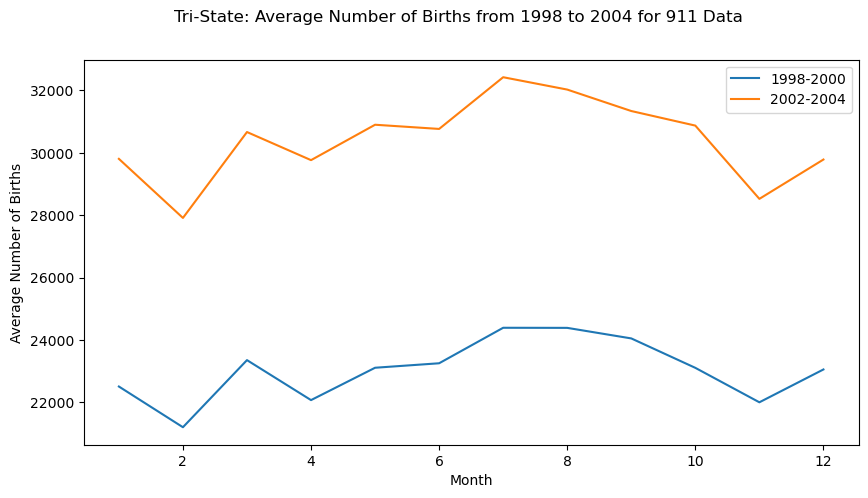

In [1091]:
# how to show a plot of 4 types of data in one plot, show the labels and the legend
plt.figure(figsize=(10,5)).suptitle('Tri-State: Average Number of Births from 1998 to 2004 for 911 Data')
plt.xlabel('Month')
plt.ylabel('Average Number of Births')
plt.plot(tri_state_911_98_00_avg_df, label='1998-2000')
plt.plot(tri_state_911_02_04_avg_df, label='2002-2004')
plt.legend()
plt.show()



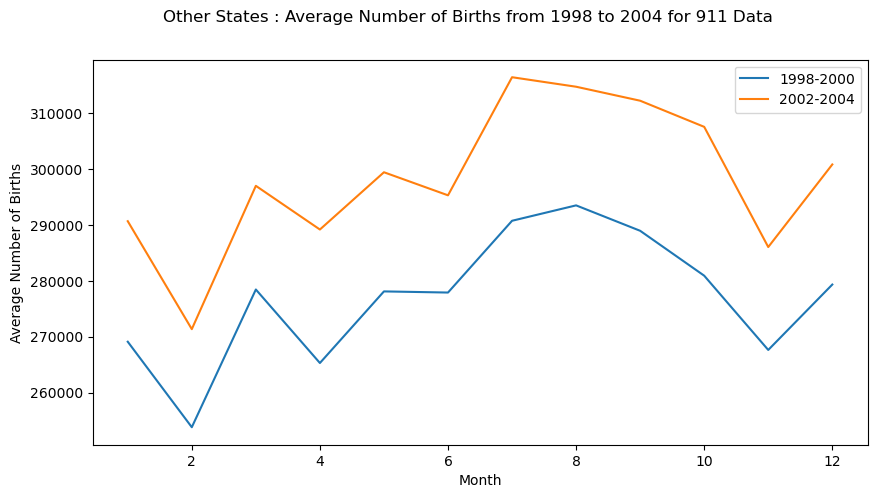

In [1092]:
# plot the other states average number of births for every month from 1998 to 2000 for 911 data and average number of births for every month from 2002 to 2004 for 911 data
plt.figure(figsize=(10,5)).suptitle('Other States : Average Number of Births from 1998 to 2004 for 911 Data')
plt.plot(other_states_911_98_00_avg_df, label='1998-2000')
plt.plot(other_states_911_02_04_avg_df, label='2002-2004')
plt.xlabel('Month')
plt.ylabel('Average Number of Births')
plt.legend()
plt.show()


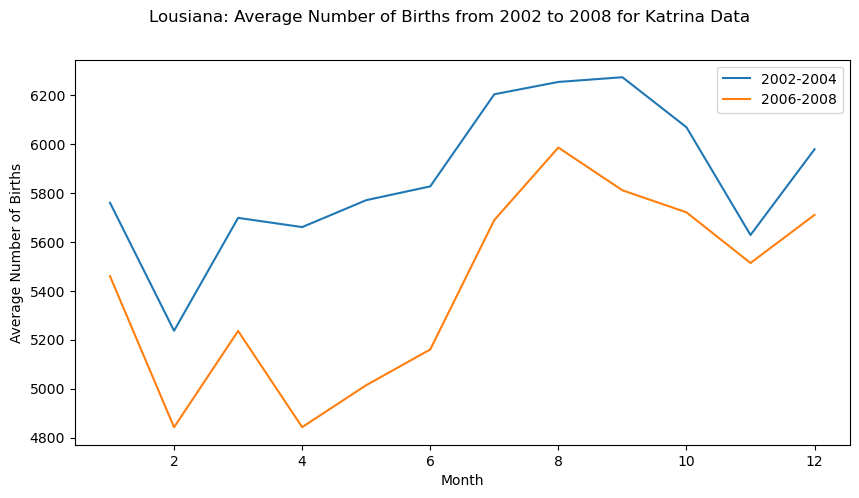

In [1093]:
# plot the LA average number of births for every month from 2002 to 2004 for katrina data and average number of births for every month from 2006 to 2008 for katrina data
plt.figure(figsize=(10,5)).suptitle('Lousiana: Average Number of Births from 2002 to 2008 for Katrina Data')
plt.plot(la_katrina_02_04_avg_df, label='2002-2004')
plt.plot(la_katrina_06_08_avg_df, label='2006-2008')
plt.xlabel('Month')
plt.ylabel('Average Number of Births')
plt.legend()
plt.show()


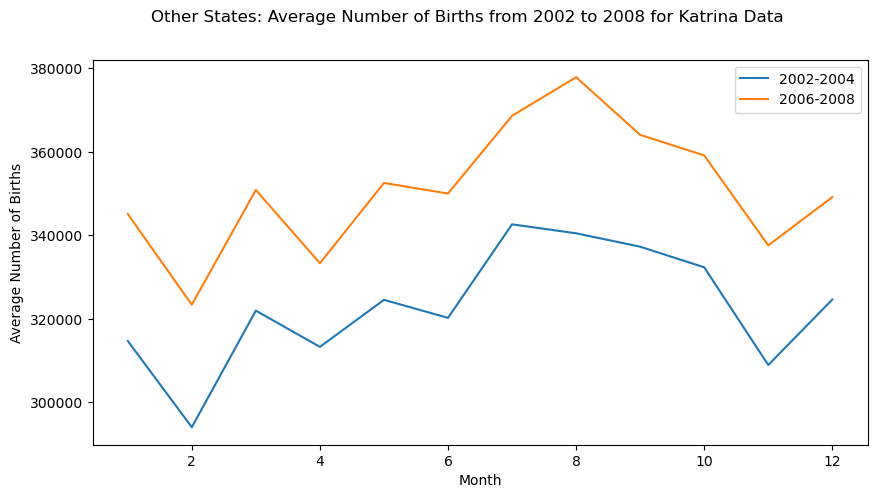

In [1094]:
# plot the other states average number of births for every month from 2002 to 2004 for katrina data and average number of births for every month from 2006 to 2008 for katrina data
plt.figure(figsize=(10,5)).suptitle('Other States: Average Number of Births from 2002 to 2008 for Katrina Data')
plt.plot(other_states_katrina_02_04_avg_df, label='2002-2004')
plt.plot(other_states_katrina_06_08_avg_df, label='2006-2008')
plt.xlabel('Month')
plt.ylabel('Average Number of Births')
plt.legend()
plt.show()


<Axes: title={'center': 'Other States Katrina Birth Data'}, xlabel='Date'>

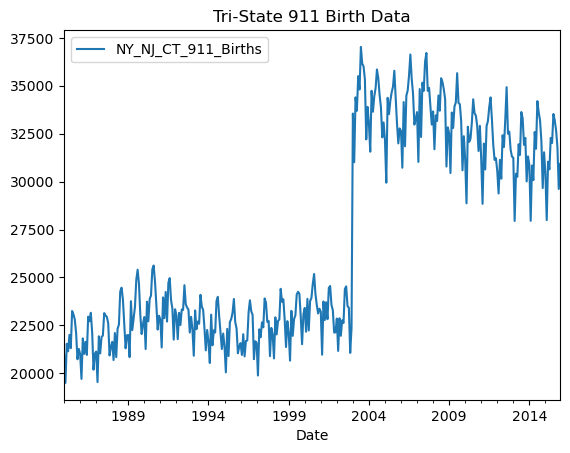

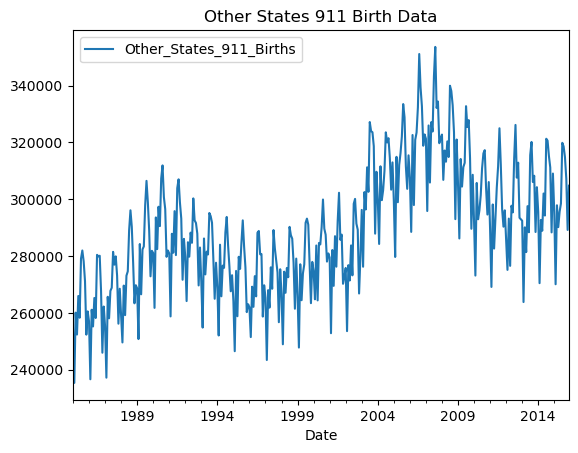

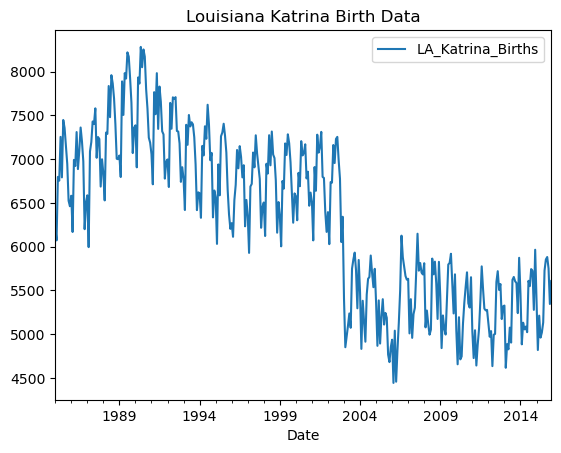

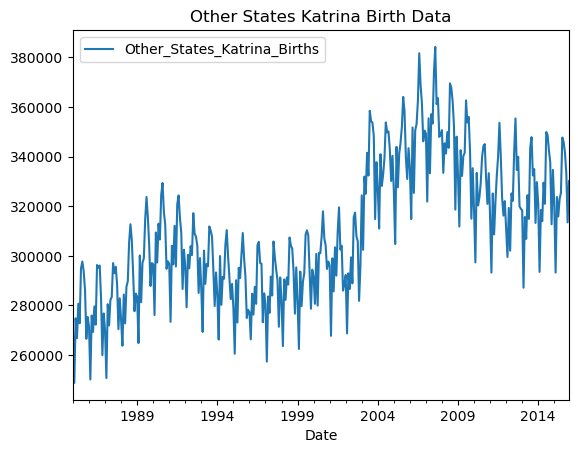

In [1095]:
# plot the data and how to show the title of the plot

tri_state_911_df.plot(title='Tri-State 911 Birth Data')
other_states_911_df.plot(title='Other States 911 Birth Data')
la_katrina_df.plot(title='Louisiana Katrina Birth Data')
other_states_katrina_df.plot(title='Other States Katrina Birth Data')


In [1096]:
# reset the index for the dataframes to use with prophet
tri_state_911_df.reset_index(inplace=True)
other_states_911_df.reset_index(inplace=True)
la_katrina_df.reset_index(inplace=True)
other_states_katrina_df.reset_index(inplace=True)

# rename the columns
tri_state_911_df.columns = ['ds', 'y']
other_states_911_df.columns = ['ds', 'y']
la_katrina_df.columns = ['ds', 'y']
other_states_katrina_df.columns = ['ds', 'y']



In [1097]:
# 911 DATA
# 

In [1098]:
# slice the data to use only the data upto September 2001 for 911 data
tri_state_911_to_01_df = tri_state_911_df[(tri_state_911_df['ds'] <= '2001-08-01')]
other_states_911_to_01_df = other_states_911_df[(other_states_911_df['ds'] <= '2001-08-01')]

# slice the data to use only the data from September 2001 to September 2004 for 911 data
tri_state_911_01_04_df = tri_state_911_df[(tri_state_911_df['ds'] >= '2001-09-01') & (tri_state_911_df['ds'] <= '2004-08-01')]
other_states_911_01_04_df = other_states_911_df[(other_states_911_df['ds'] >= '2001-09-01') & (other_states_911_df['ds'] <= '2004-08-01')]

# display the data
display(tri_state_911_to_01_df.head())
display(other_states_911_to_01_df.head())
display(tri_state_911_01_04_df.head())
display(other_states_911_01_04_df.head())


,ds,y
0,1985-01-01,20990
1,1985-02-01,19500
2,1985-03-01,21541
3,1985-04-01,21149
4,1985-05-01,22006


,ds,y
0,1985-01-01,254893
1,1985-02-01,235307
2,1985-03-01,260061
3,1985-04-01,252359
4,1985-05-01,265930


,ds,y
200,2001-09-01,23558
201,2001-10-01,23299
202,2001-11-01,22128
203,2001-12-01,22137
204,2002-01-01,22856


,ds,y
200,2001-09-01,285736
201,2001-10-01,287545
202,2001-11-01,270231
203,2001-12-01,272629
204,2002-01-01,275815


In [1099]:
# create a dataframe that shows the actual number of births for every month upto 2004 for 911 data
tri_state_911_actual_df = tri_state_911_df[(tri_state_911_df['ds'] <= '2004-08-01')]
other_states_911_actual_df = other_states_911_df[(other_states_911_df['ds'] <= '2004-08-01')]

<Axes: title={'center': '911 Births in Other States between 2001 and 2004'}, xlabel='ds'>

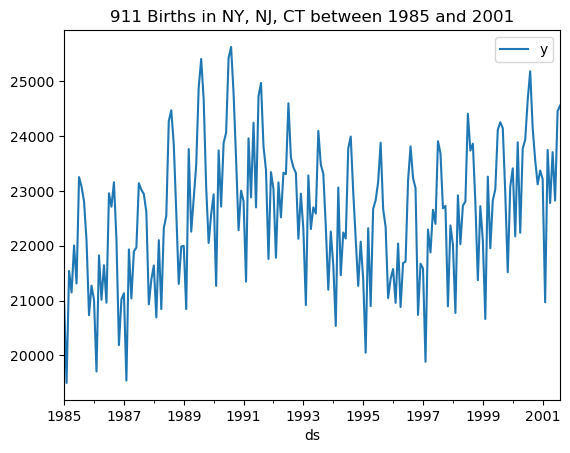

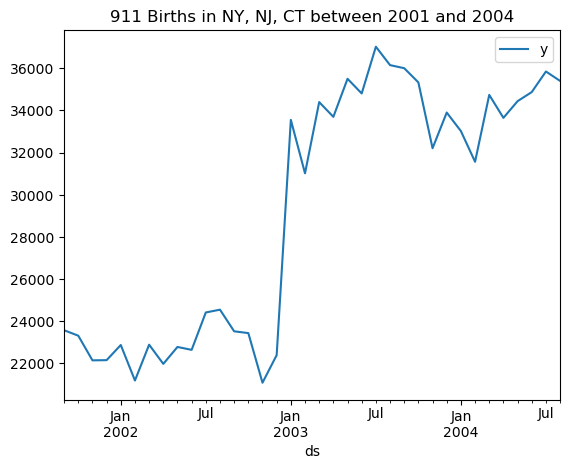

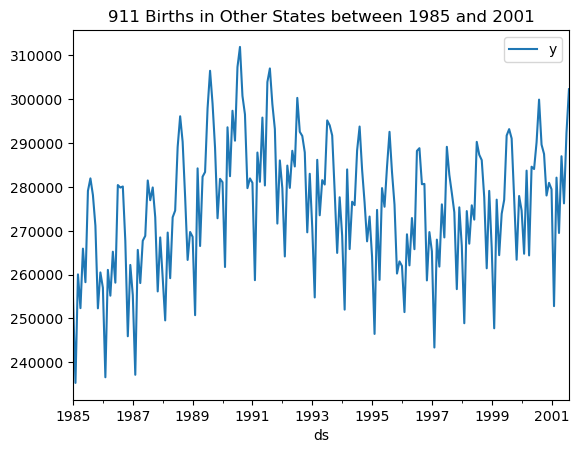

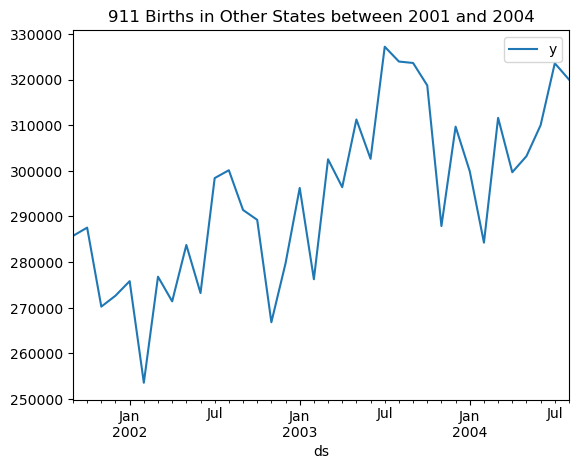

In [1100]:
# plot the data
tri_state_911_to_01_df.plot(x='ds', y='y', title='911 Births in NY, NJ, CT between 1985 and 2001')
tri_state_911_01_04_df.plot(x='ds', y='y', title='911 Births in NY, NJ, CT between 2001 and 2004')

other_states_911_to_01_df.plot(x='ds', y='y', title='911 Births in Other States between 1985 and 2001')
other_states_911_01_04_df.plot(x='ds', y='y', title='911 Births in Other States between 2001 and 2004')

In [1101]:
# create a prophet model
m911 = Prophet()
m911_other = Prophet()


In [1102]:
# fit the model
m911.fit(tri_state_911_to_01_df)
m911_other.fit(other_states_911_to_01_df)


14:14:40 - cmdstanpy - INFO - Chain [1] start processing
14:14:40 - cmdstanpy - INFO - Chain [1] done processing
14:14:40 - cmdstanpy - INFO - Chain [1] start processing
14:14:40 - cmdstanpy - INFO - Chain [1] done processing


In [1103]:
# create a future dataframe for 911 data and predict the values for the next 10 years
future911 = m911.make_future_dataframe(periods=36, freq='M')
future911_other = m911_other.make_future_dataframe(periods=36, freq='M')
forecast911 = m911.predict(future911)
forecast911_other = m911_other.predict(future911_other)

/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [1104]:
# display the forecast
display(forecast911.tail())
display(forecast911_other.tail())


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
231,2004-03-31,24534.990739,22898.406895,24158.666511,24070.211758,24920.701865,-999.291815,-999.291815,-999.291815,-999.291815,-999.291815,-999.291815,0.0,0.0,0.0,23535.698924
232,2004-04-30,24560.783181,24053.172055,25316.311151,24063.758771,24972.155378,152.351413,152.351413,152.351413,152.351413,152.351413,152.351413,0.0,0.0,0.0,24713.134594
233,2004-05-31,24587.435370,23794.701596,25101.499563,24059.291659,25024.361407,-111.325774,-111.325774,-111.325774,-111.325774,-111.325774,-111.325774,0.0,0.0,0.0,24476.109596
234,2004-06-30,24613.227812,25252.435561,26604.775834,24069.596960,25070.769189,1318.306167,1318.306167,1318.306167,1318.306167,1318.306167,1318.306167,0.0,0.0,0.0,25931.533979
235,2004-07-31,24639.880001,25423.052081,26761.330848,24079.836116,25109.598132,1510.951452,1510.951452,1510.951452,1510.951452,1510.951452,1510.951452,0.0,0.0,0.0,26150.831453


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
231,2004-03-31,291890.619412,273999.756235,287432.899003,286627.866966,297506.358069,-11163.739517,-11163.739517,-11163.739517,-11163.739517,-11163.739517,-11163.739517,0.0,0.0,0.0,280726.879895
232,2004-04-30,292140.255538,287361.834429,301362.460730,286585.947661,298034.138944,1891.569352,1891.569352,1891.569352,1891.569352,1891.569352,1891.569352,0.0,0.0,0.0,294031.824890
233,2004-05-31,292398.212868,282851.473394,297780.610983,286464.104714,298602.769822,-2182.244209,-2182.244209,-2182.244209,-2182.244209,-2182.244209,-2182.244209,0.0,0.0,0.0,290215.968659
234,2004-06-30,292647.848994,300192.101695,315538.096558,286416.540633,299123.882034,14883.417211,14883.417211,14883.417211,14883.417211,14883.417211,14883.417211,0.0,0.0,0.0,307531.266204
235,2004-07-31,292905.806324,302244.320061,317642.794424,286323.941238,299606.315667,17027.954793,17027.954793,17027.954793,17027.954793,17027.954793,17027.954793,0.0,0.0,0.0,309933.761117


/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


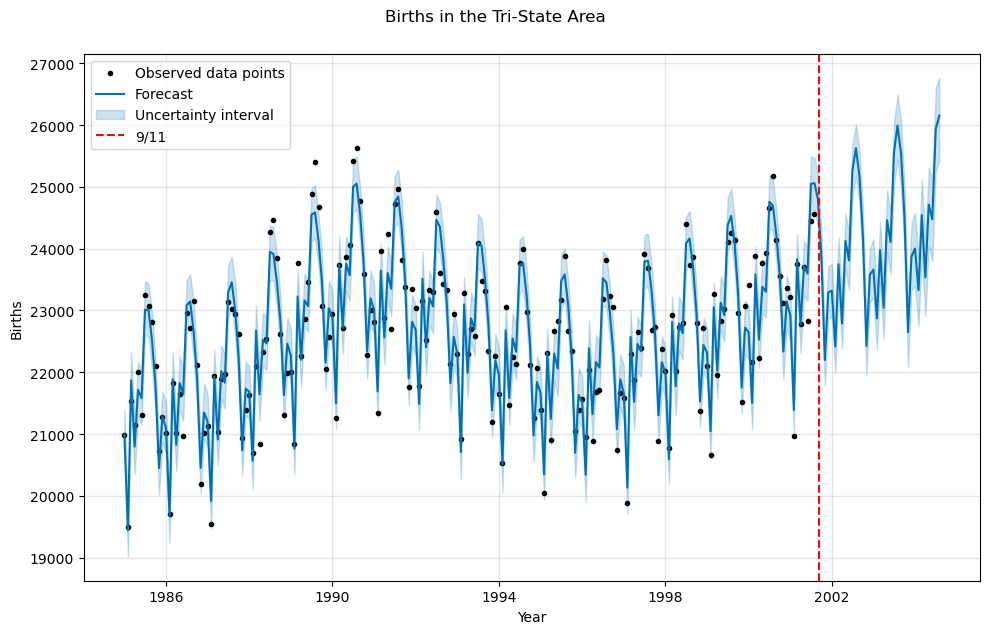

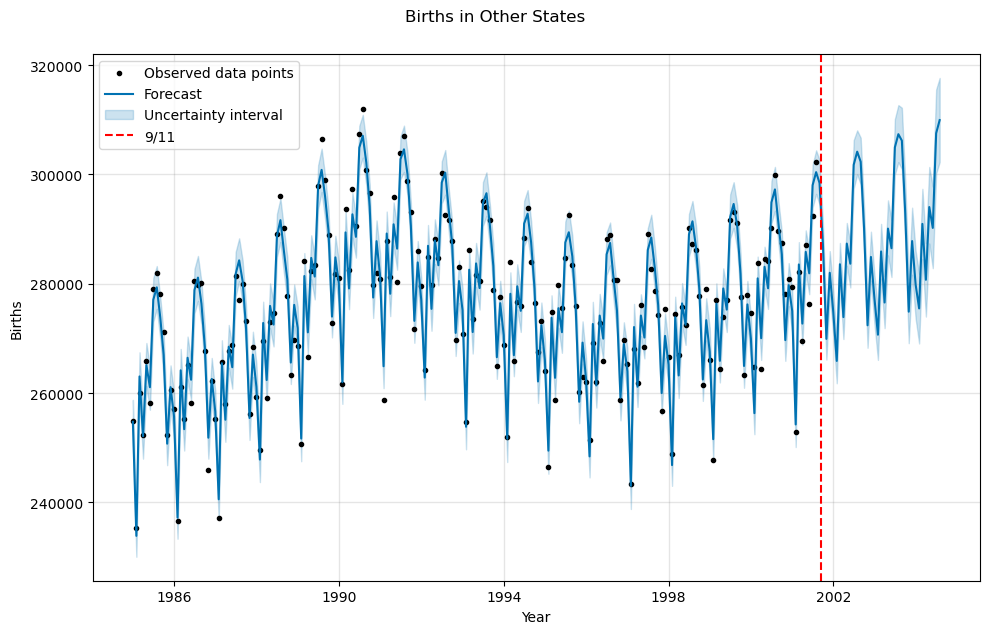

In [1105]:
# plot the prediction
fig911 = m911.plot(forecast911)
fig911.suptitle('Births in the Tri-State Area', fontsize=12, y=1.05, x=0.5)
# Mark the 9/11 event
event_date = pd.to_datetime('2001-09-11')
plt.axvline(x=event_date, color='red', linestyle='--', label='9/11')
plt.xlabel('Year')
plt.ylabel('Births')
plt.legend()
plt.show()
fig911_other = m911_other.plot(forecast911_other)
fig911_other.suptitle('Births in Other States', fontsize=12, y=1.05, x=0.5)
# Mark the 9/11 event
event_date = pd.to_datetime('2001-09-11')
plt.axvline(x=event_date, color='red', linestyle='--', label='9/11')
plt.xlabel('Year')
plt.ylabel('Births')
plt.legend()
plt.show()

/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To ret

Text(0.5, 0.98, 'Prediction for NY, NJ and CT states')

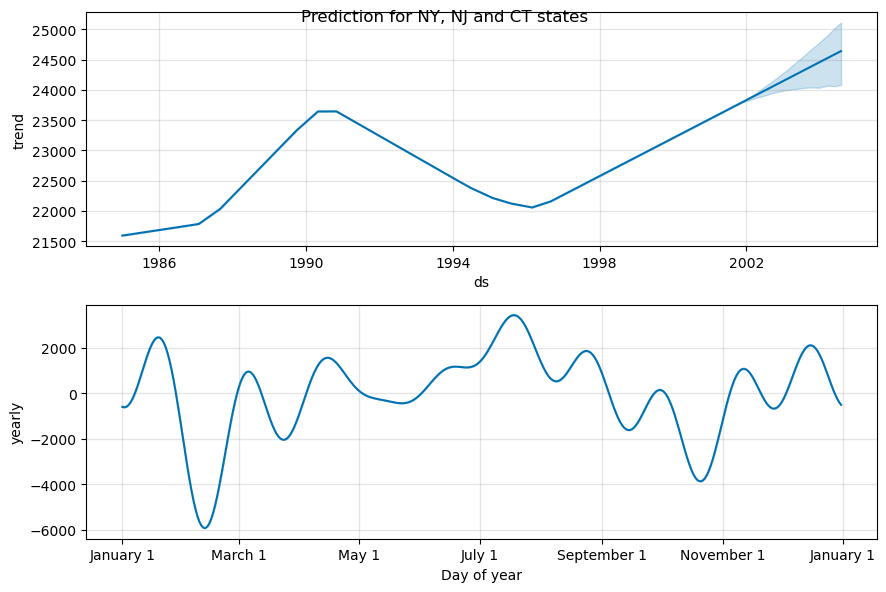

In [1106]:
# plot the components
fig911_comp = m911.plot_components(forecast911)
fig911_comp.suptitle('Prediction for NY, NJ and CT states', fontsize=12)

/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To ret

Text(0.5, 0.98, 'Prediction for States other than NY, NJ and CT')

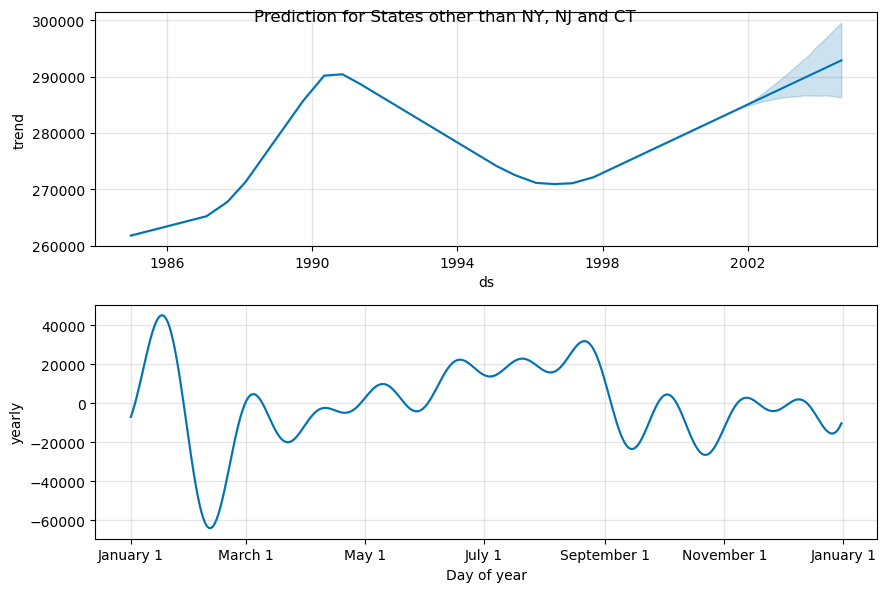

In [1107]:
# plot the components and add title "Prediction from 2001 to 2011 for States other than NY, NJ and CT" to the plots

fig911_other_comp = m911_other.plot_components(forecast911_other)
fig911_other_comp.suptitle('Prediction for States other than NY, NJ and CT', fontsize=12)

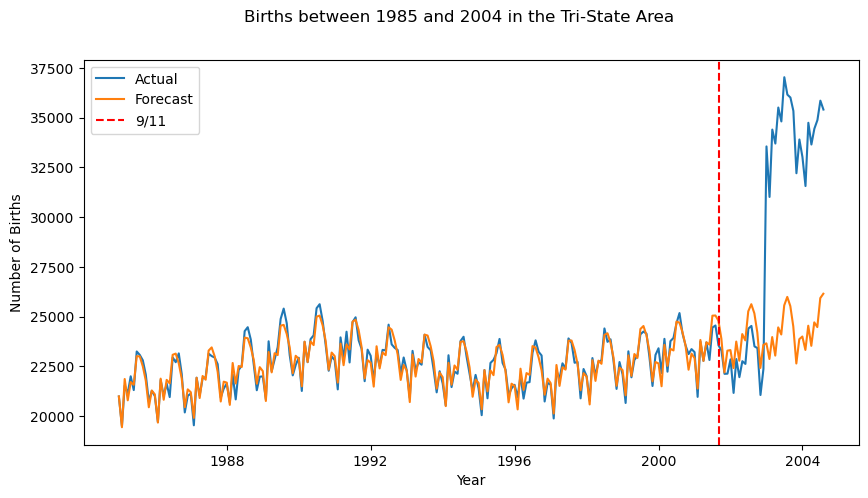

In [1108]:
# compare the forecast with the actual data for 911 data
plt.figure(figsize=(10,5)).suptitle('Births between 1985 and 2004 in the Tri-State Area')
plt.plot(tri_state_911_actual_df['ds'], tri_state_911_actual_df['y'], label='Actual')
plt.plot(forecast911['ds'], forecast911['yhat'], label='Forecast')

# Mark the 9/11 event
event_date = pd.to_datetime('2001-09-11')
plt.axvline(x=event_date, color='red', linestyle='--', label='9/11')

plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend()
plt.show()


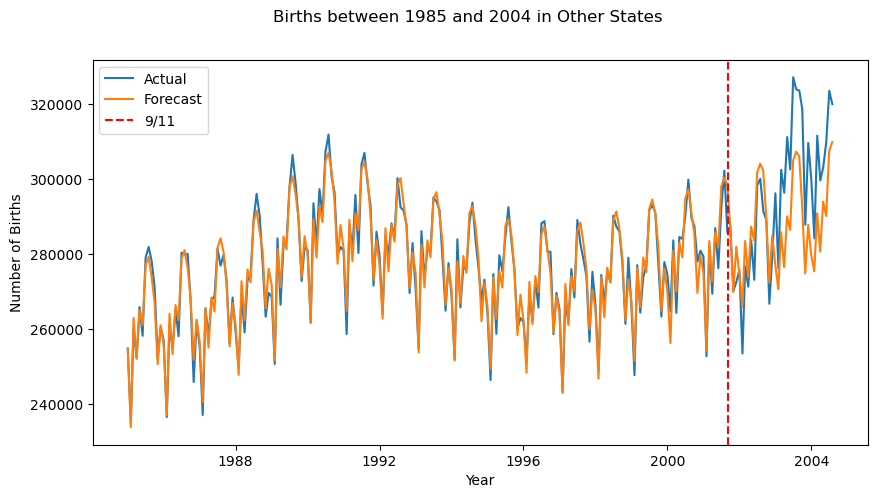

In [1109]:
# compare the forecast with the actual data for 911 data for other states
plt.figure(figsize=(10,5)).suptitle('Births between 1985 and 2004 in Other States')
plt.plot(other_states_911_actual_df['ds'], other_states_911_actual_df['y'], label='Actual')
plt.plot(forecast911_other['ds'], forecast911_other['yhat'], label='Forecast')

# Mark the 9/11 event
event_date = pd.to_datetime('2001-09-11')
plt.axvline(x=event_date, color='red', linestyle='--', label='9/11')

plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend()
plt.show()


In [1110]:
# create dfs for 911 actual data showing growth percentage
tri_state_911_actual_df['growth'] = tri_state_911_actual_df['y'].pct_change()
other_states_911_actual_df['growth'] = other_states_911_actual_df['y'].pct_change()



/var/folders/b_/hfr4p_vs0nq_qyzqdx8n584m0000gn/T/ipykernel_51447/3018119569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tri_state_911_actual_df['growth'] = tri_state_911_actual_df['y'].pct_change()
/var/folders/b_/hfr4p_vs0nq_qyzqdx8n584m0000gn/T/ipykernel_51447/3018119569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_states_911_actual_df['growth'] = other_states_911_actual_df['y'].pct_change()


In [1111]:
# tri-state 911 forecast data showing growth percentage
forecast911['growth'] = forecast911['yhat'].pct_change()
forecast911_other['growth'] = forecast911_other['yhat'].pct_change()


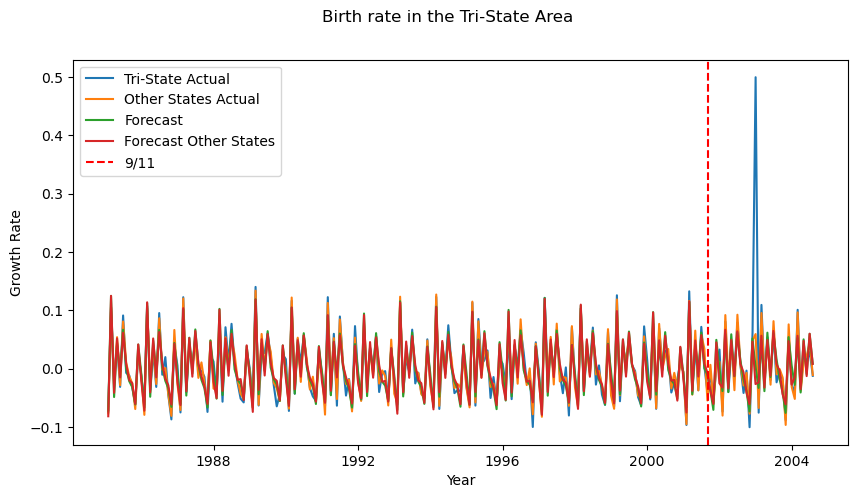

In [1112]:
# plot the actual and forecast growth for 911 data
plt.figure(figsize=(10,5)).suptitle('Birth rate in the Tri-State Area')
plt.plot(tri_state_911_actual_df['ds'], tri_state_911_actual_df['growth'], label='Tri-State Actual')
plt.plot(other_states_911_actual_df['ds'], other_states_911_actual_df['growth'], label='Other States Actual')
plt.plot(forecast911['ds'], forecast911['growth'], label='Forecast')
plt.plot(forecast911_other['ds'], forecast911_other['growth'], label='Forecast Other States')
#Mark the 9/11 event
event_date = pd.to_datetime('2001-09-11')
plt.axvline(x=event_date, color='red', linestyle='--', label='9/11')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.legend()
plt.show()


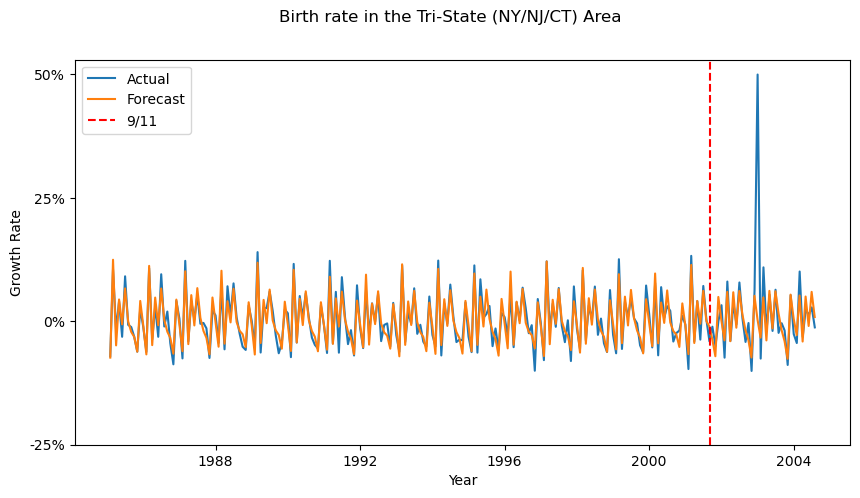

In [1144]:
# plot the actual and forecast growth for 911 data
plt.figure(figsize=(10,5)).suptitle('Birth rate in the Tri-State (NY/NJ/CT) Area')
plt.plot(tri_state_911_actual_df['ds'], tri_state_911_actual_df['growth'], label='Actual')
plt.plot(forecast911['ds'], forecast911['growth'], label='Forecast')
#Mark the 9/11 event
event_date = pd.to_datetime('2001-09-11')
plt.axvline(x=event_date, color='red', linestyle='--', label='9/11')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.yticks(ticks=[-0.25, 0, 0.25, 0.5], labels=['-25%','0%', '25%', '50%' ])
plt.legend()
plt.show()


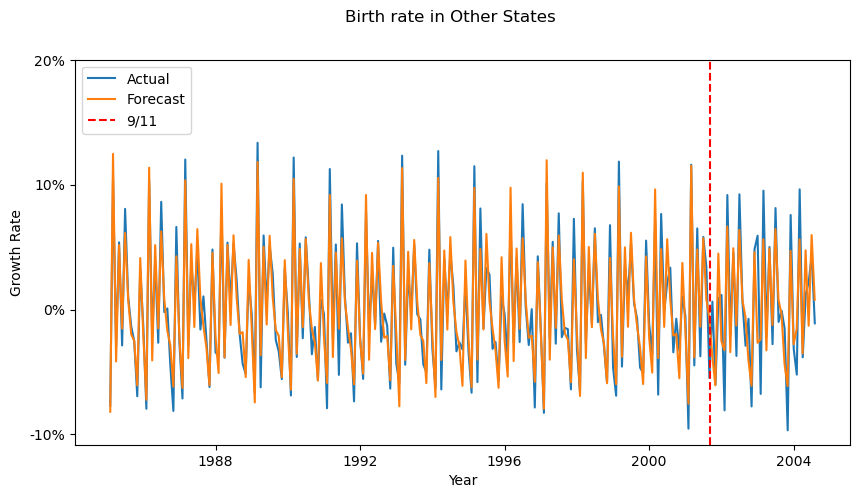

In [1147]:
# plot the actual and forecast growth for 911 data for other states
plt.figure(figsize=(10,5)).suptitle('Birth rate in Other States')
plt.plot(other_states_911_actual_df['ds'], other_states_911_actual_df['growth'], label='Actual')
plt.plot(forecast911_other['ds'], forecast911_other['growth'], label='Forecast')
#Mark the 9/11 event
event_date = pd.to_datetime('2001-09-11')
plt.axvline(x=event_date, color='red', linestyle='--', label='9/11')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.yticks(ticks=[-0.10, 0, 0.10, 0.20], labels=['-10%','0%', '10%', '20%' ])
plt.legend(loc='upper left')
plt.show()


In [1113]:
# KATRINA DATA

In [1114]:
# select data only upto August 2005 for Katrina data
la_katrina_to_05_df = la_katrina_df[(la_katrina_df['ds'] <= '2005-07-01')]
other_states_katrina_to_05_df = other_states_katrina_df[(other_states_katrina_df['ds'] <= '2005-07-01')]

# select data only from August 2005 to August 2008 for Katrina data
la_katrina_05_08_df = la_katrina_df[(la_katrina_df['ds'] >= '2005-08-01') & (la_katrina_df['ds'] <= '2008-08-01')]
other_states_katrina_05_08_df = other_states_katrina_df[(other_states_katrina_df['ds'] >= '2005-08-01') & (other_states_katrina_df['ds'] <= '2008-08-01')]

# display the data
display(la_katrina_to_05_df.head())
display(other_states_katrina_to_05_df.head())
display(la_katrina_05_08_df.head())
display(other_states_katrina_05_08_df.head())
display(la_katrina_to_05_df.info())
display(other_states_katrina_to_05_df.info())
display(la_katrina_05_08_df.info())
display(other_states_katrina_05_08_df.info())



,ds,y
0,1985-01-01,6234
1,1985-02-01,6071
2,1985-03-01,6797
3,1985-04-01,6753
4,1985-05-01,7254


,ds,y
0,1985-01-01,269649
1,1985-02-01,248736
2,1985-03-01,274805
3,1985-04-01,266755
4,1985-05-01,280682


,ds,y
247,2005-08-01,5242
248,2005-09-01,5186
249,2005-10-01,4766
250,2005-11-01,4680
251,2005-12-01,4851


,ds,y
247,2005-08-01,364074
248,2005-09-01,358183
249,2005-10-01,339873
250,2005-11-01,330987
251,2005-12-01,343403


<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 0 to 246
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      247 non-null    datetime64[ns]
 1   y       247 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 247 entries, 0 to 246
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      247 non-null    datetime64[ns]
 1   y       247 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


None

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 247 to 283
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      37 non-null     datetime64[ns]
 1   y       37 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 888.0 bytes


None

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 247 to 283
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      37 non-null     datetime64[ns]
 1   y       37 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 888.0 bytes


None

In [1115]:
# create a dataframe that shows the actual number of births for every month upto 2008 for katrina data
la_katrina_actual_df = la_katrina_df[(la_katrina_df['ds'] <= '2008-08-01')]
other_states_katrina_actual_df = other_states_katrina_df[(other_states_katrina_df['ds'] <= '2008-08-01')]
# display the data
display(la_katrina_actual_df.head(20))
display(la_katrina_actual_df.tail(20))


,ds,y
0,1985-01-01,6234
1,1985-02-01,6071
2,1985-03-01,6797
3,1985-04-01,6753
4,1985-05-01,7254
5,1985-06-01,6791
6,1985-07-01,7447
7,1985-08-01,7356
8,1985-09-01,7147
9,1985-10-01,6945


,ds,y
264,2007-01-01,5632
265,2007-02-01,5008
266,2007-03-01,5399
267,2007-04-01,4957
268,2007-05-01,5228
269,2007-06-01,5301
270,2007-07-01,5707
271,2007-08-01,6147
272,2007-09-01,5725
273,2007-10-01,5812


In [1116]:
# # slice the data to use from August 2000 to August 2005 for Katrina data use monthly average for the data
# la_katrina_00_05_df = la_katrina_df[(la_katrina_df['ds'] >= '2000-08-01') & (la_katrina_df['ds'] <= '2005-08-01')]
# other_states_katrina_00_05_df = other_states_katrina_df[(other_states_katrina_df['ds'] >= '2000-08-01') & (other_states_katrina_df['ds'] <= '2005-08-01')]
# # slice the data to use from August 2005 to August 2010 for Katrina data
# la_katrina_05_10_df = la_katrina_df[(la_katrina_df['ds'] >= '2005-08-01') & (la_katrina_df['ds'] <= '2010-08-01')]
# other_states_katrina_05_10_df = other_states_katrina_df[(other_states_katrina_df['ds'] >= '2005-08-01') & (other_states_katrina_df['ds'] <= '2010-08-01')]
# # display the data
# display(la_katrina_00_05_df.head())
# display(other_states_katrina_00_05_df.head())
# display(la_katrina_05_10_df.head())
# display(other_states_katrina_05_10_df.head())
# display(la_katrina_00_05_df.info())


In [1117]:
# # slice the data to use from August 2002 to August 2005 for Katrina data
# la_katrina_02_05_df = la_katrina_df[(la_katrina_df['ds'] >= '2002-08-01') & (la_katrina_df['ds'] <= '2005-08-01')]
# other_states_katrina_02_05_df = other_states_katrina_df[(other_states_katrina_df['ds'] >= '2002-08-01') & (other_states_katrina_df['ds'] <= '2005-08-01')]
# # slice the data to use from August 2005 to August 2008 for Katrina data
# la_katrina_05_08_df = la_katrina_df[(la_katrina_df['ds'] >= '2005-08-01') & (la_katrina_df['ds'] <= '2008-08-01')]
# other_states_katrina_05_08_df = other_states_katrina_df[(other_states_katrina_df['ds'] >= '2005-08-01') & (other_states_katrina_df['ds'] <= '2008-08-01')]


<Axes: title={'center': 'Births in Other States between 2005 and 2008 (after Katrina)'}, xlabel='ds'>

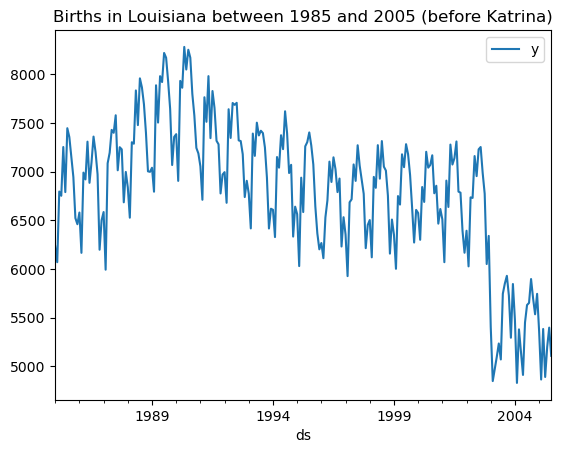

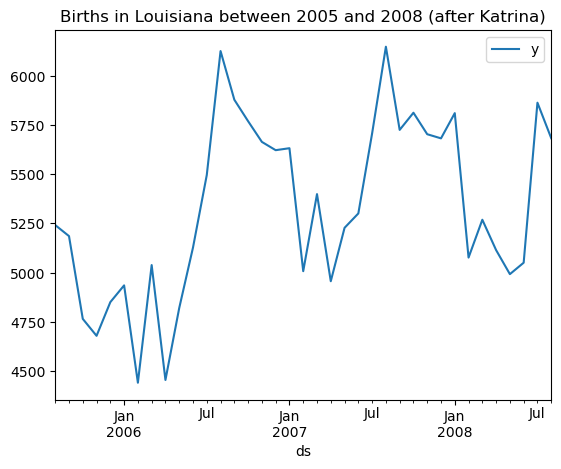

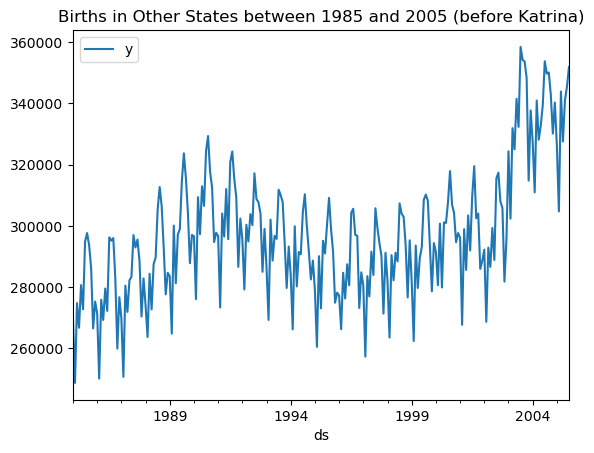

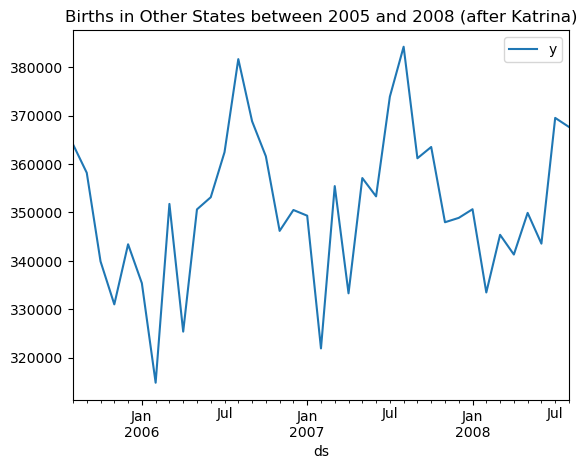

In [1118]:
# plot the data up to Katrina and 3 years after Katrina
la_katrina_to_05_df.plot(x='ds', y='y', title='Births in Louisiana between 1985 and 2005 (before Katrina)')
la_katrina_05_08_df.plot(x='ds', y='y', title='Births in Louisiana between 2005 and 2008 (after Katrina)')
other_states_katrina_to_05_df.plot(x='ds', y='y', title='Births in Other States between 1985 and 2005 (before Katrina)')
other_states_katrina_05_08_df.plot(x='ds', y='y', title='Births in Other States between 2005 and 2008 (after Katrina)')

In [1119]:
# create a prophet model
m_katrina = Prophet()
m_katrina_other = Prophet()

# fit the model
m_katrina.fit(la_katrina_to_05_df)
m_katrina_other.fit(other_states_katrina_to_05_df)

14:14:42 - cmdstanpy - INFO - Chain [1] start processing
14:14:42 - cmdstanpy - INFO - Chain [1] done processing
14:14:42 - cmdstanpy - INFO - Chain [1] start processing
14:14:42 - cmdstanpy - INFO - Chain [1] done processing


In [1120]:
# create a future dataframe for Katrina data and predict the values for the next 3 years
future_katrina = m_katrina.make_future_dataframe(periods=36, freq='M')
future_katrina_other = m_katrina_other.make_future_dataframe(periods=36, freq='M')
forecast_katrina = m_katrina.predict(future_katrina)
forecast_katrina_other = m_katrina_other.predict(future_katrina_other)


/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [1121]:
# display the forecast
display(forecast_katrina.tail())
display(forecast_katrina_other.tail())


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
278,2008-02-29,4017.589007,3723.126834,4413.567089,3864.571673,4163.691919,49.173560,49.173560,49.173560,49.173560,49.173560,49.173560,0.0,0.0,0.0,4066.762567
279,2008-03-31,3984.351138,3546.127683,4287.823534,3823.981901,4138.943555,-51.041308,-51.041308,-51.041308,-51.041308,-51.041308,-51.041308,0.0,0.0,0.0,3933.309830
280,2008-04-30,3952.185459,3975.043912,4732.970689,3779.242599,4110.508427,391.792357,391.792357,391.792357,391.792357,391.792357,391.792357,0.0,0.0,0.0,4343.977816
281,2008-05-31,3918.947590,3665.177161,4382.573474,3737.439339,4088.332770,106.523142,106.523142,106.523142,106.523142,106.523142,106.523142,0.0,0.0,0.0,4025.470732
282,2008-06-30,3886.781911,4030.999482,4757.332661,3694.378619,4066.034548,515.225240,515.225240,515.225240,515.225240,515.225240,515.225240,0.0,0.0,0.0,4402.007151


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
278,2008-02-29,380620.680954,369629.993655,388060.882359,374944.525481,386118.516224,-1680.681556,-1680.681556,-1680.681556,-1680.681556,-1680.681556,-1680.681556,0.0,0.0,0.0,378939.999399
279,2008-03-31,381658.429586,359950.836157,378917.894595,375649.981368,387473.673173,-11847.701848,-11847.701848,-11847.701848,-11847.701848,-11847.701848,-11847.701848,0.0,0.0,0.0,369810.727739
280,2008-04-30,382662.702456,376109.807484,395161.957942,376395.397836,388732.403097,2925.855204,2925.855204,2925.855204,2925.855204,2925.855204,2925.855204,0.0,0.0,0.0,385588.557660
281,2008-05-31,383700.451088,368672.916153,389747.710372,377040.068054,390077.697880,-4045.032201,-4045.032201,-4045.032201,-4045.032201,-4045.032201,-4045.032201,0.0,0.0,0.0,379655.418887
282,2008-06-30,384704.723957,391387.473552,411126.135329,377690.284123,391419.427689,16587.628478,16587.628478,16587.628478,16587.628478,16587.628478,16587.628478,0.0,0.0,0.0,401292.352435


/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


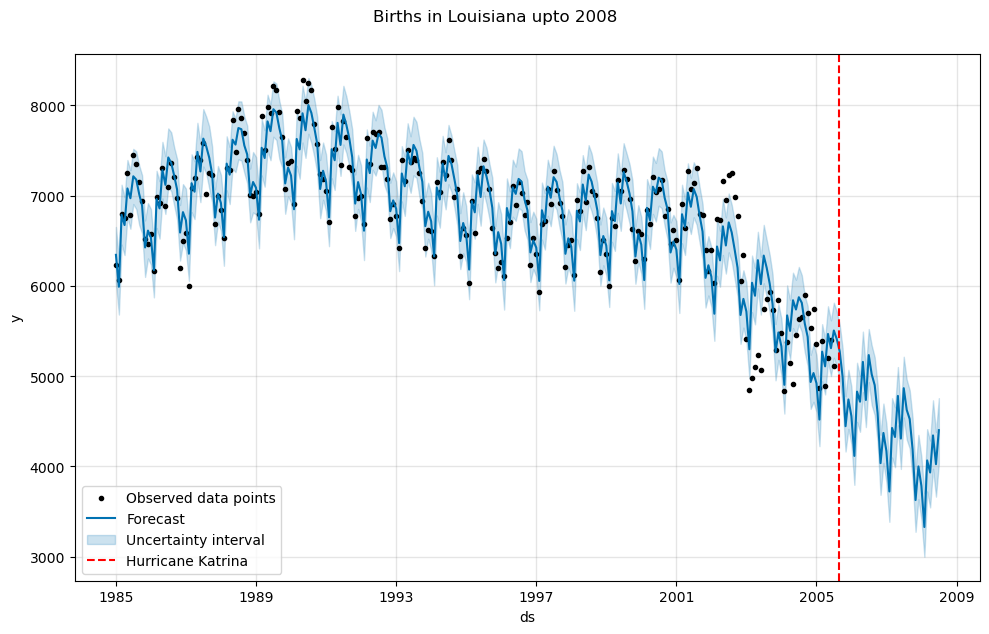

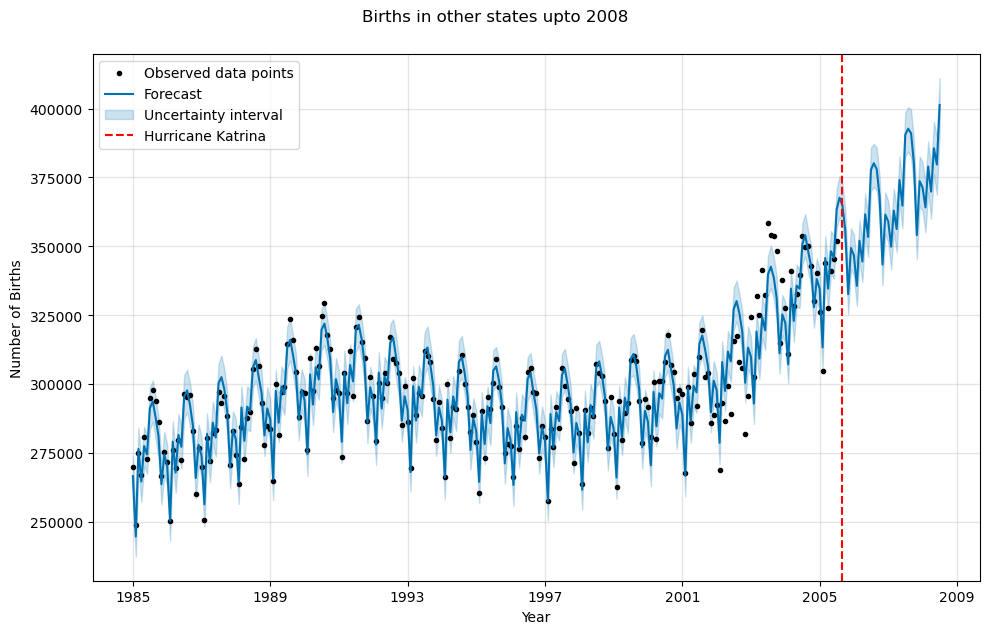

In [1122]:
# plot the prediction
fig_katrina = m_katrina.plot(forecast_katrina)
fig_katrina.suptitle('Births in Louisiana upto 2008', fontsize=12, y=1.05, x=0.5) 
# mark the date of the event
plt.axvline(x=pd.to_datetime('2005-08-29'), color='red', linestyle='--', label='Hurricane Katrina')
plt.legend()

fig_katrina_other = m_katrina_other.plot(forecast_katrina_other)
fig_katrina_other.suptitle('Births in other states upto 2008', fontsize=12, y=1.05, x=0.5)
plt.xlabel('Year')
plt.ylabel('Number of Births')
# mark the date of the event
plt.axvline(x=pd.to_datetime('2005-08-29'), color='red', linestyle='--', label='Hurricane Katrina')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend()



/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/homebrew/anaconda3/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To ret

Text(0.5, 0.98, 'Prediction for Other States (post Katrina)')

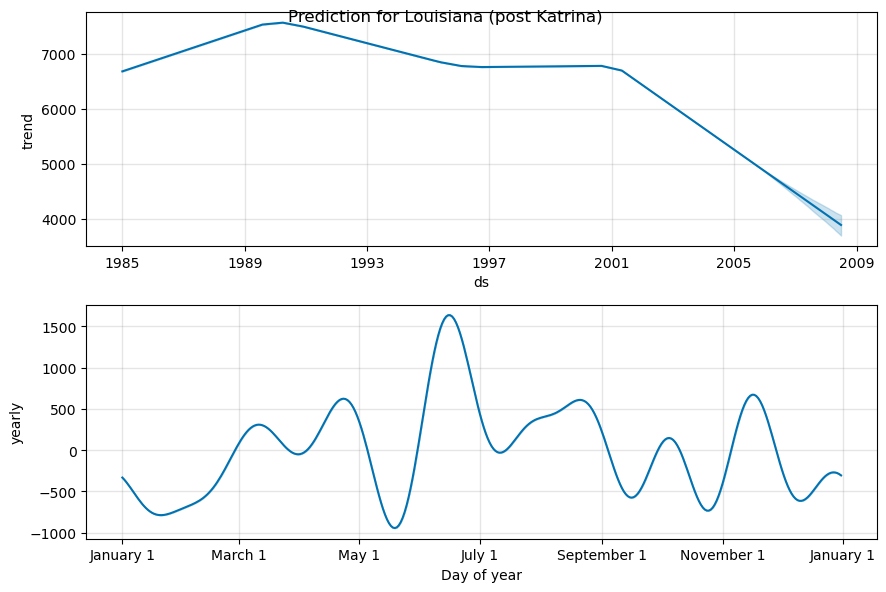

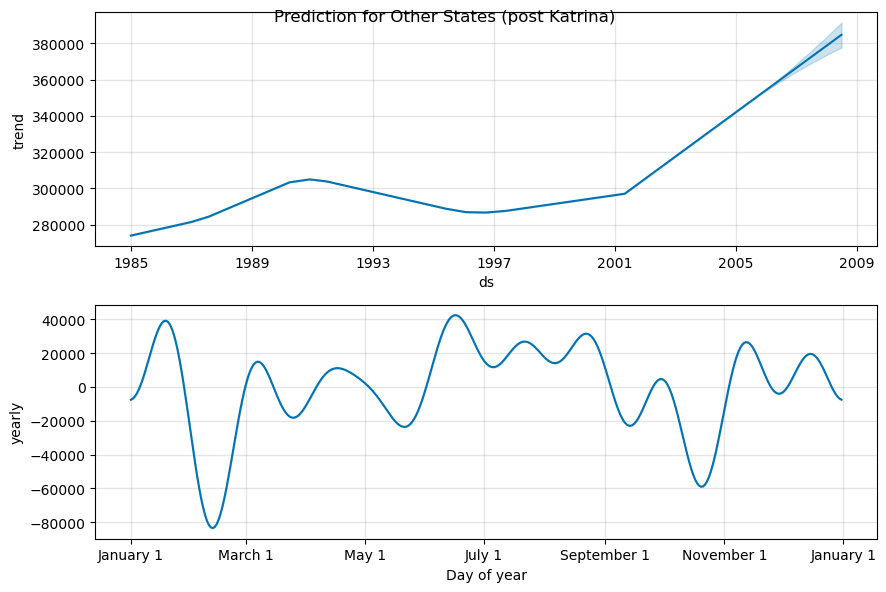

In [1123]:
# plot the components
fig_katrina_comp = m_katrina.plot_components(forecast_katrina)
fig_katrina_comp.suptitle('Prediction for Louisiana (post Katrina)', fontsize=12)
fig_katrina_other_comp = m_katrina_other.plot_components(forecast_katrina_other)
fig_katrina_other_comp.suptitle('Prediction for Other States (post Katrina)', fontsize=12)

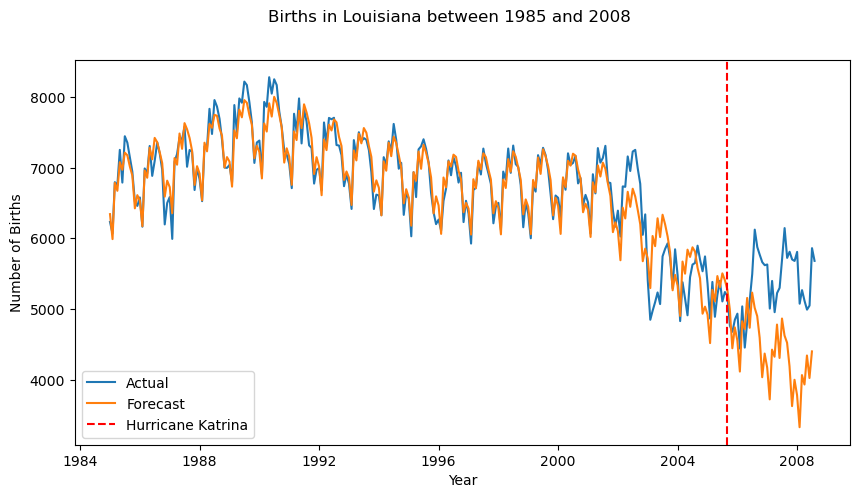

In [1124]:
#plot the forecast and actual data for Katrina data
plt.figure(figsize=(10,5)).suptitle('Births in Louisiana between 1985 and 2008')
plt.plot(la_katrina_actual_df['ds'], la_katrina_actual_df['y'], label='Actual')
plt.plot(forecast_katrina['ds'], forecast_katrina['yhat'], label='Forecast')
# Mark the Katrina event
event_date = pd.to_datetime('2005-08-29')
plt.axvline(x=event_date, color='red', linestyle='--', label='Hurricane Katrina')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend()
plt.show()

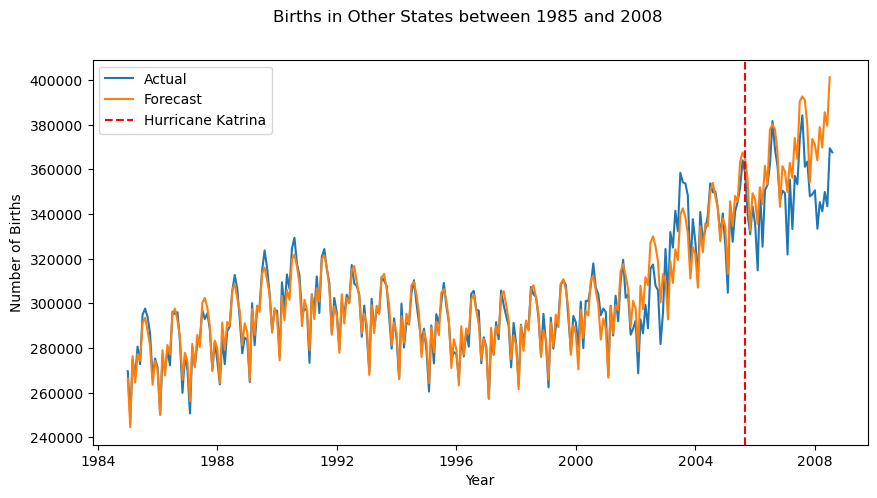

In [1125]:
#plot the forecast and actual data for Katrina data for other states
plt.figure(figsize=(10,5)).suptitle('Births in Other States between 1985 and 2008')
plt.plot(other_states_katrina_actual_df['ds'], other_states_katrina_actual_df['y'], label='Actual')
plt.plot(forecast_katrina_other['ds'], forecast_katrina_other['yhat'], label='Forecast')
# Mark the Katrina event
event_date = pd.to_datetime('2005-08-29')
plt.axvline(x=event_date, color='red', linestyle='--', label='Hurricane Katrina')
plt.xlabel('Year')
plt.ylabel('Number of Births')
plt.legend()
plt.show()


In [1133]:
# create dfs for katrina actual data showing growth percentage
la_katrina_actual_df['growth'] = la_katrina_actual_df['y'].pct_change()
other_states_katrina_actual_df['growth'] = other_states_katrina_actual_df['y'].pct_change()
la_katrina_actual_df.tail(20)


/var/folders/b_/hfr4p_vs0nq_qyzqdx8n584m0000gn/T/ipykernel_51447/2588333833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_katrina_actual_df['growth'] = la_katrina_actual_df['y'].pct_change()
/var/folders/b_/hfr4p_vs0nq_qyzqdx8n584m0000gn/T/ipykernel_51447/2588333833.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_states_katrina_actual_df['growth'] = other_states_katrina_actual_df['y'].pct_change()


,ds,y,growth
264,2007-01-01,5632,0.001779
265,2007-02-01,5008,-0.110795
266,2007-03-01,5399,0.078075
267,2007-04-01,4957,-0.081867
268,2007-05-01,5228,0.054670
269,2007-06-01,5301,0.013963
270,2007-07-01,5707,0.076589
271,2007-08-01,6147,0.077098
272,2007-09-01,5725,-0.068651
273,2007-10-01,5812,0.015197


In [1134]:
# create dfs for katrina forecast data showing growth percentage
forecast_katrina['growth'] = forecast_katrina['yhat'].pct_change()
forecast_katrina_other['growth'] = forecast_katrina_other['yhat'].pct_change()
forecast_katrina.tail(20)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,growth
263,2006-11-30,4506.507331,4038.913905,4696.901333,4448.485361,4560.467714,-135.271309,-135.271309,-135.271309,-135.271309,-135.271309,-135.271309,0.0,0.0,0.0,4371.236022,0.082888
264,2006-12-31,4473.269463,3829.158163,4474.922076,4411.473882,4532.205839,-301.520709,-301.520709,-301.520709,-301.520709,-301.520709,-301.520709,0.0,0.0,0.0,4171.748753,-0.045636
265,2007-01-31,4440.031594,3386.373101,4035.084657,4373.210361,4503.880505,-717.153002,-717.153002,-717.153002,-717.153002,-717.153002,-717.153002,0.0,0.0,0.0,3722.878592,-0.107598
266,2007-02-28,4410.010294,4098.986948,4757.166175,4336.076328,4479.758879,17.030691,17.030691,17.030691,17.030691,17.030691,17.030691,0.0,0.0,0.0,4427.040985,0.189145
267,2007-03-31,4376.772425,3991.674422,4654.907520,4297.356142,4451.652895,-50.417614,-50.417614,-50.417614,-50.417614,-50.417614,-50.417614,0.0,0.0,0.0,4326.354811,-0.022743
268,2007-04-30,4344.606746,4455.443682,5101.712364,4259.937848,4425.529594,437.254973,437.254973,437.254973,437.254973,437.254973,437.254973,0.0,0.0,0.0,4781.861719,0.105287
269,2007-05-31,4311.368877,3972.256631,4607.266976,4221.408820,4398.067002,-2.346551,-2.346551,-2.346551,-2.346551,-2.346551,-2.346551,0.0,0.0,0.0,4309.022326,-0.098882
270,2007-06-30,4279.203198,4542.309515,5215.860675,4180.661297,4372.098002,588.044408,588.044408,588.044408,588.044408,588.044408,588.044408,0.0,0.0,0.0,4867.247606,0.129548
271,2007-07-31,4245.965329,4298.653661,4962.003367,4138.626676,4344.056748,380.412451,380.412451,380.412451,380.412451,380.412451,380.412451,0.0,0.0,0.0,4626.377781,-0.049488
272,2007-08-31,4212.727461,4200.598601,4844.806826,4099.225475,4319.175590,312.366492,312.366492,312.366492,312.366492,312.366492,312.366492,0.0,0.0,0.0,4525.093953,-0.021893


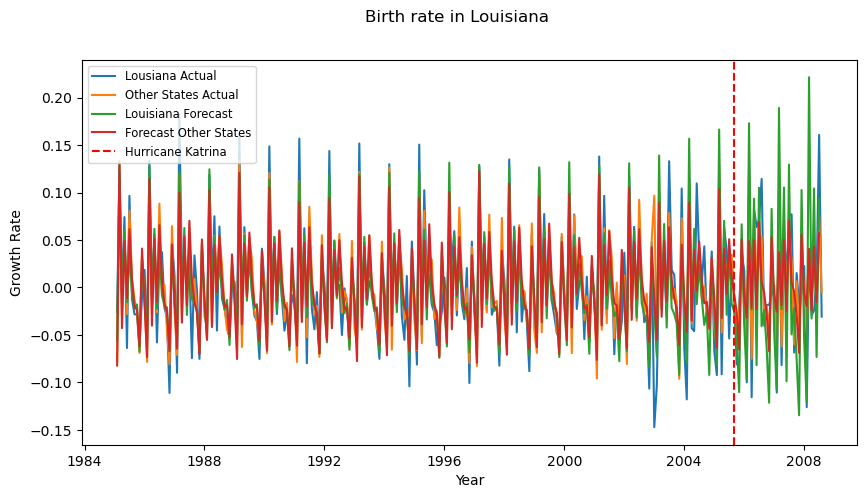

In [1128]:
# plot the actual and forecast growth for katrina data
plt.figure(figsize=(10,5)).suptitle('Birth rate in Louisiana')
plt.plot(la_katrina_actual_df['ds'], la_katrina_actual_df['growth'], label='Lousiana Actual')
plt.plot(other_states_katrina_actual_df['ds'], other_states_katrina_actual_df['growth'], label='Other States Actual')
plt.plot(forecast_katrina['ds'], forecast_katrina['growth'], label='Louisiana Forecast')
plt.plot(forecast_katrina_other['ds'], forecast_katrina_other['growth'], label='Forecast Other States')
#Mark the Katrina event
event_date = pd.to_datetime('2005-08-29')
plt.axvline(x=event_date, color='red', linestyle='--', label='Hurricane Katrina')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.legend(loc='upper left', fontsize='small')
plt.show()

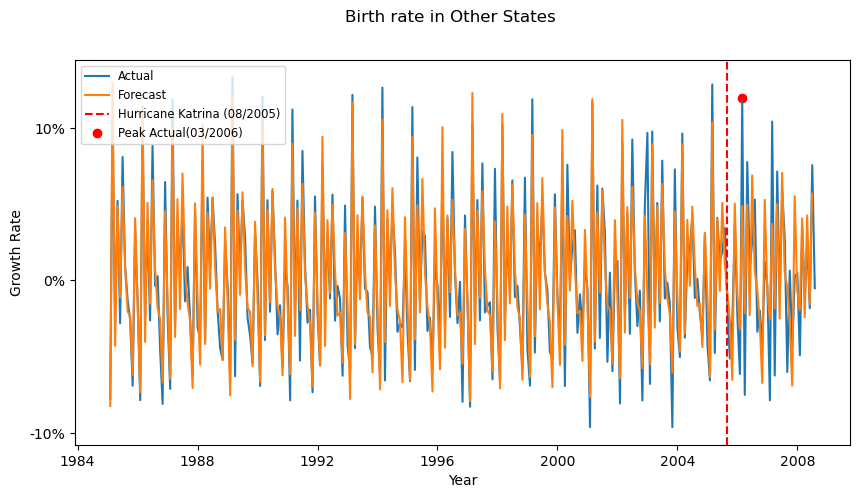

In [1169]:
# plot the actual and forecast growth for katrina other states data
plt.figure(figsize=(10,5)).suptitle('Birth rate in Other States')
plt.plot(other_states_katrina_actual_df['ds'], other_states_katrina_actual_df['growth'], label='Actual')
plt.plot(forecast_katrina_other['ds'], forecast_katrina_other['growth'], label='Forecast')
#Mark the Katrina event
event_date = pd.to_datetime('2005-08-29')
plt.axvline(x=event_date, color='red', linestyle='--', label='Hurricane Katrina (08/2005)')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.yticks(ticks=[-0.10, 0, 0.10, 0.15], labels=['-10%','0%', '10%', '15%' ])
plt.scatter(pd.to_datetime('2006-03-01'), 0.12, color='red', label='Peak Actual(03/2006)')
plt.legend(loc='upper left', fontsize='small')
plt.show()

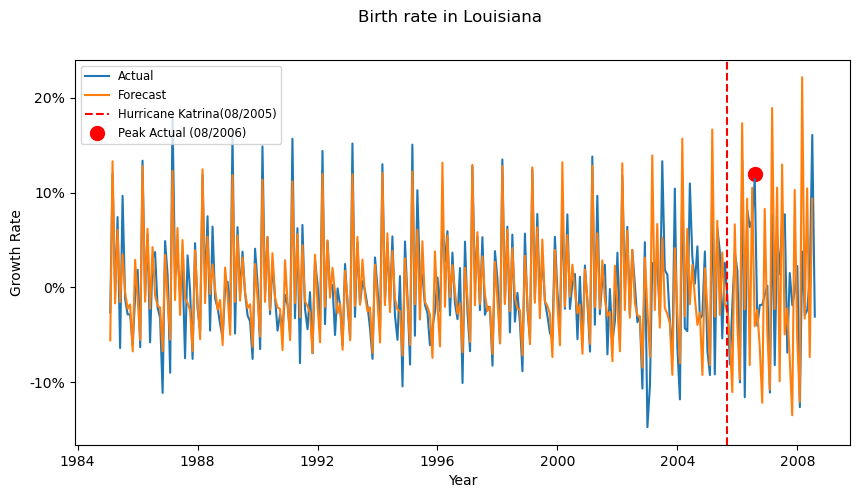

In [1168]:
# plot the actual and forecast growth for katrina data
plt.figure(figsize=(10,5)).suptitle('Birth rate in Louisiana')
plt.plot(la_katrina_actual_df['ds'], la_katrina_actual_df['growth'], label='Actual')
plt.plot(forecast_katrina['ds'], forecast_katrina['growth'], label='Forecast')
#Mark the Katrina event
event_date = pd.to_datetime('2005-08-29')
plt.axvline(x=event_date, color='red', linestyle='--', label='Hurricane Katrina(08/2005)')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.yticks(ticks=[-0.10, 0, 0.10, 0.20], labels=['-10%','0%', '10%', '20%' ])
#mark a point on the graph to highlight the peak actual after Katrina, use a red circle
plt.scatter(pd.to_datetime('2006-08-01'), 0.12, color='red', s=100, label='Peak Actual (08/2006)')
plt.legend(loc='upper left', fontsize='small')
plt.show()

/var/folders/b_/hfr4p_vs0nq_qyzqdx8n584m0000gn/T/ipykernel_51447/3433427966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_katrina_05_08_actual_df['growth'] = la_katrina_05_08_actual_df['y'].pct_change()
/var/folders/b_/hfr4p_vs0nq_qyzqdx8n584m0000gn/T/ipykernel_51447/3433427966.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forecast_katrina_05_08['growth'] = forecast_katrina_05_08['yhat'].pct_change()


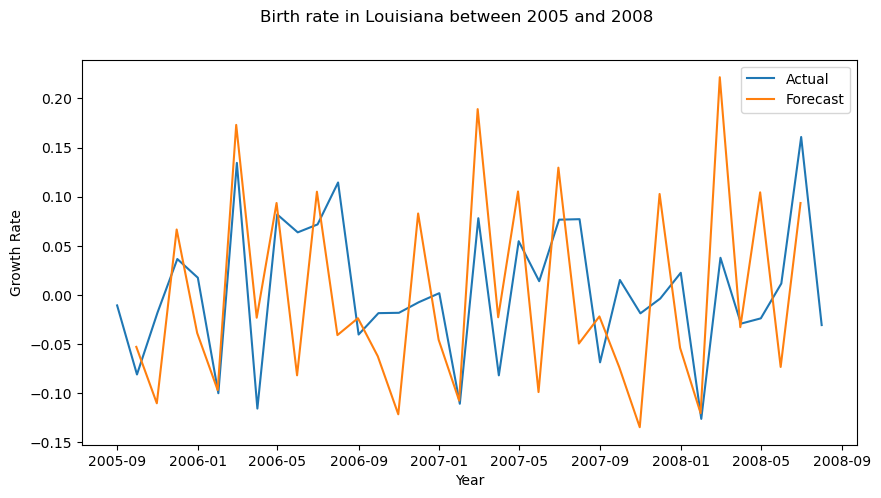

In [1131]:
# go granular and plot the actual and forecast growth for katrina data for Louisiana use the data from 2005 to 2008
la_katrina_05_08_actual_df = la_katrina_df[(la_katrina_df['ds'] >= '2005-08-01') & (la_katrina_df['ds'] <= '2008-08-01')]
la_katrina_05_08_actual_df['growth'] = la_katrina_05_08_actual_df['y'].pct_change()
forecast_katrina_05_08 = forecast_katrina[(forecast_katrina['ds'] >= '2005-08-01') & (forecast_katrina['ds'] <= '2008-08-01')]
forecast_katrina_05_08['growth'] = forecast_katrina_05_08['yhat'].pct_change()
plt.figure(figsize=(10,5)).suptitle('Birth rate in Louisiana between 2005 and 2008')
plt.plot(la_katrina_05_08_actual_df['ds'], la_katrina_05_08_actual_df['growth'], label='Actual')
plt.plot(forecast_katrina_05_08['ds'], forecast_katrina_05_08['growth'], label='Forecast')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.legend()
plt.show()

